In [1]:
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np 
import time, math, random, gym
from typing import Tuple
import matplotlib.pyplot as plt

In [2]:
env = gym.make('CartPole-v1')

In [3]:
n_bins = ( 6 , 12 )
lower_bounds = [ env.observation_space.low[2], -math.radians(50) ]
upper_bounds = [ env.observation_space.high[2], math.radians(50) ]

def discretizer( _ , __ , angle, pole_velocity ) -> Tuple[int,...]:
    """Convert continues state intro a discrete state"""
    est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    est.fit([lower_bounds, upper_bounds ])
    return tuple(map(int,est.transform([[angle, pole_velocity]])[0]))


In [4]:
Q_table = np.zeros(n_bins + (env.action_space.n,))

In [5]:
def policy(state: tuple):
    return np.argmax(Q_table[state])

def new_Q_value(reward: float, new_state: tuple, discount_factor=1) -> float:
    future_optimal_value = np.max(Q_table[new_state])
    learned_value = reward + discount_factor * future_optimal_value
    return learned_value

def learning_rate(n: int, min_rate=0.001) -> float:
    return max(min_rate, min(1.0, 1.0 - math.log10((n + 1) / 25)))

def exploration_rate(n: int, min_rate=0.00001) -> float :
    return max(min_rate, min(1.0, 1.0 - math.log10((n  + 1) / 25)))

Episode num: 0, epochs run: 44,
Episode num: 10, epochs run: 32,
Episode num: 20, epochs run: 19,
Episode num: 30, epochs run: 12,
Episode num: 40, epochs run: 29,
Episode num: 50, epochs run: 19,
Episode num: 60, epochs run: 20,
Episode num: 70, epochs run: 18,
Episode num: 80, epochs run: 22,
Episode num: 90, epochs run: 94,
Episode num: 100, epochs run: 56,
Episode num: 110, epochs run: 28,
Episode num: 120, epochs run: 37,
Episode num: 130, epochs run: 74,
Episode num: 140, epochs run: 22,
Episode num: 150, epochs run: 84,
Episode num: 160, epochs run: 104,
Episode num: 170, epochs run: 39,
Episode num: 180, epochs run: 763,
Episode num: 190, epochs run: 2255,
Episode num: 200, epochs run: 2586,
Episode num: 210, epochs run: 3348,
Episode num: 220, epochs run: 446,
Episode num: 230, epochs run: 2239,
Episode num: 240, epochs run: 1736,
Episode num: 250, epochs run: 2589,
Episode num: 260, epochs run: 1024,
Episode num: 270, epochs run: 1911,
Episode num: 280, epochs run: 2082,
Epis

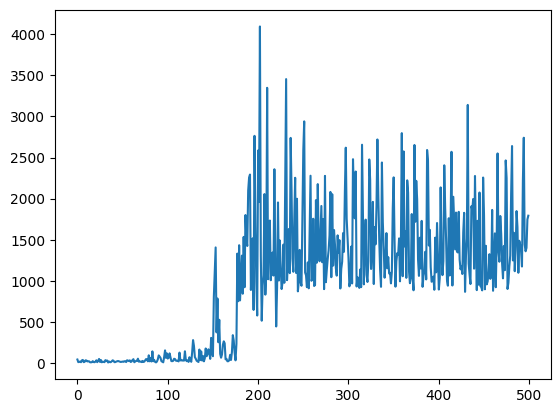

In [6]:
epochs_run_tbl = []
for episode_num in range(500):
    current_state, done = discretizer(*env.reset()[0]), False
    epochs_run = 0
    while not done:
        action = policy(current_state)
        
        if np.random.random() < exploration_rate(episode_num): 
            action = env.action_space.sample()
         
        obs, reward, done, _, _ = env.step(action)
        new_state = discretizer(*obs)

        # if done and epochs_run < 150:
        #     reward = -200
        
        lr = learning_rate(episode_num)
        learnt_value = new_Q_value(reward , new_state )
        old_value = Q_table[current_state][action]
        Q_table[current_state][action] = (1-lr)*old_value + lr*learnt_value
        epochs_run += 1
        current_state = new_state
    if episode_num % 10 == 0:
        print(f"Episode num: {episode_num}, epochs run: {epochs_run},")
    epochs_run_tbl.append(epochs_run)
env.close()
plt.plot(epochs_run_tbl, label="Epochs run for each episode")
plt.show()